In [1]:
# loading the required libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn 

In [2]:
# install keras neural-network library
!pip install keras

In [3]:
# loading the dataset 
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step


In [4]:
# checking the shape
print('X_train shape - ',X_train.shape)
print('X_test shape - ',X_test.shape)
print('y_train shape - ',y_train.shape)
print('y_test shape - ',y_test.shape)


X_train shape -  (50000, 32, 32, 3)
X_test shape -  (10000, 32, 32, 3)
y_train shape -  (50000, 1)
y_test shape -  (10000, 1)


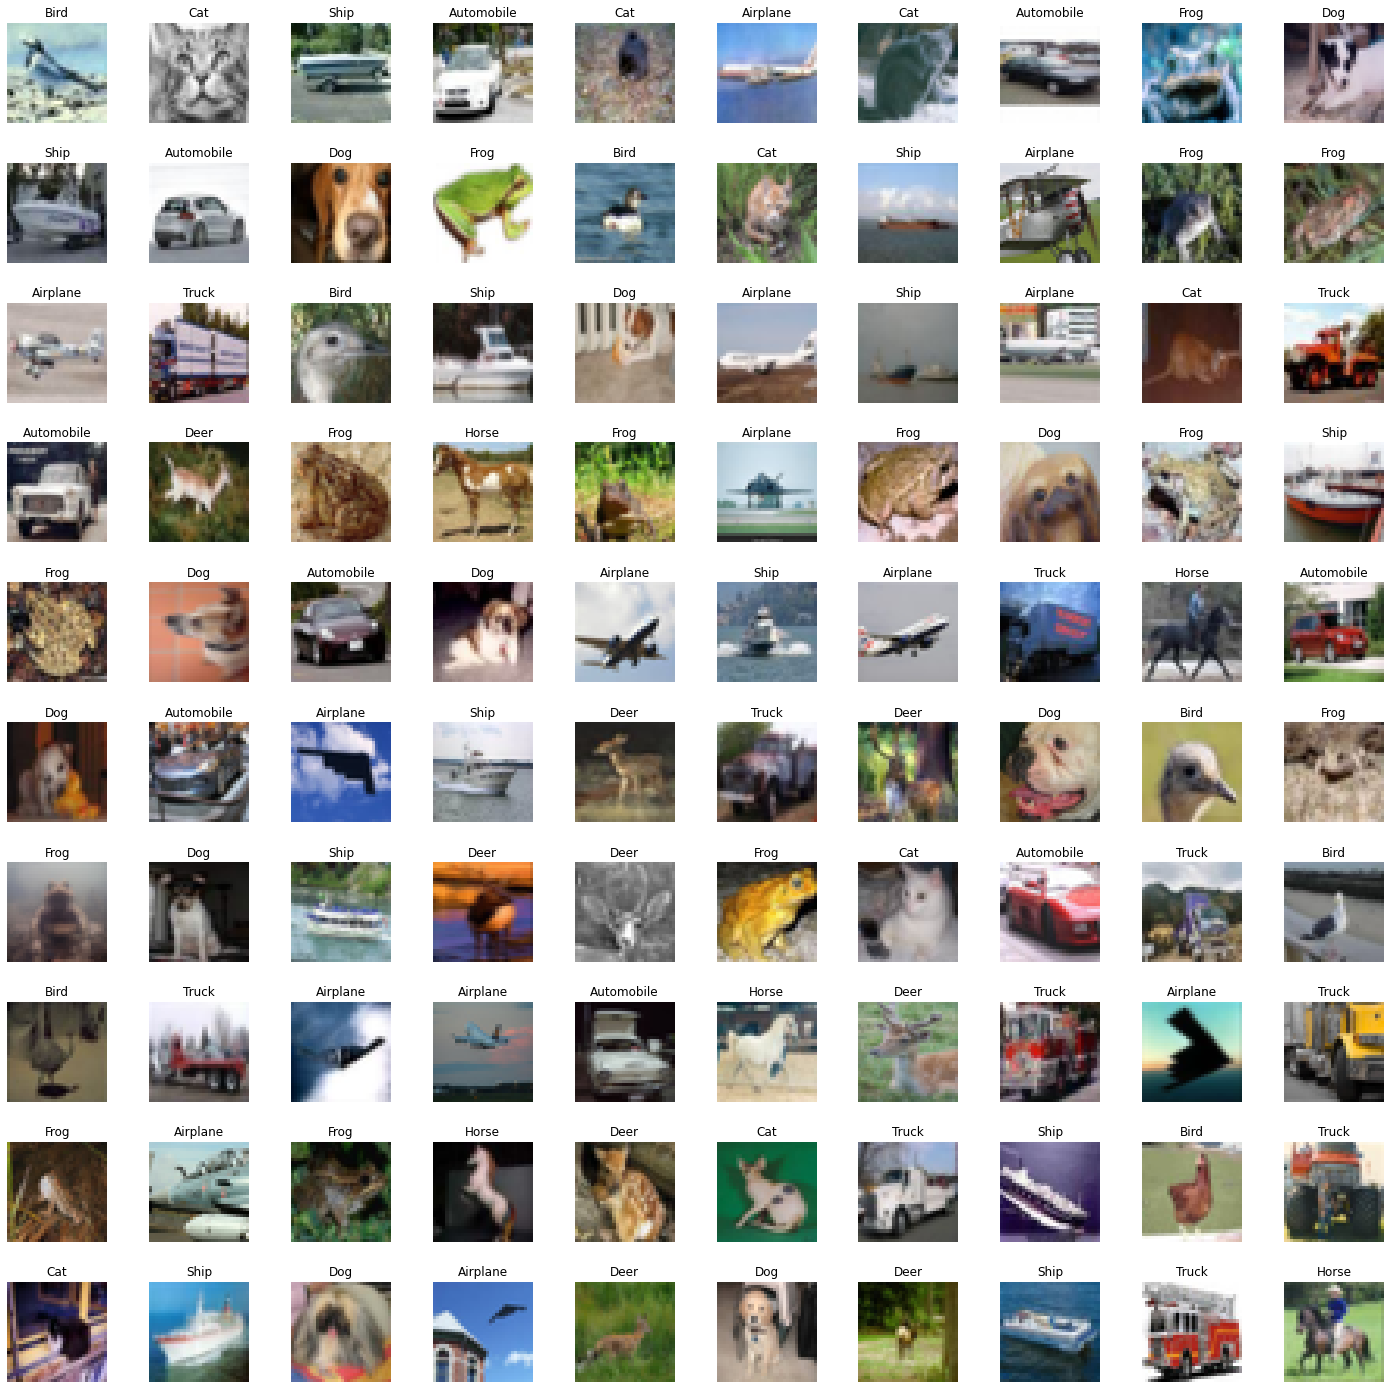

In [5]:
# visualizing few samples

labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in range(0,L_grid*W_grid):
    index = np.random.randint(0,n_training) # pick a random number
    axes[i].imshow(X_train[index])
    index = y_train[index]
    axes[i].set_title(labels[int(index)])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [6]:
# converting the values into float and normalizing
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255


In [7]:
# encoding the Predictor variable
import keras
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [8]:
# Storing the input shape
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,AveragePooling2D,MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [10]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(AveragePooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [11]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adam(lr = 0.001), metrics = ['accuracy'])

In [12]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       147584    
_________________________________________________________________
average_pooling2d (AveragePo (None, 5, 5, 128)         0

In [13]:
# fitting the train data into the model
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 10, shuffle = True,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5322 - accuracy: 0.4393 - val_loss: 1.3907 - val_accuracy: 0.4976
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1456 - accuracy: 0.5900 - val_loss: 0.9812 - val_accuracy: 0.6561
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9645 - accuracy: 0.6568 - val_loss: 0.8494 - val_accuracy: 0.7013
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8491 - accuracy: 0.7015 - val_loss: 0.8094 - val_accuracy: 0.7271
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7734 - accuracy: 0.7279 - val_loss: 0.7842 - val_accuracy: 0.7283
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7117 - accuracy: 0.7489 - val_loss: 0.7196 - val_accuracy: 0.7570
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6491 - accuracy: 0.7681 - val_loss: 0.7575 - val_ac

In [14]:
# Evaluating the model performance
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.7463 - accuracy: 0.7632
Test Accuracy: 0.7631999850273132


In [15]:
predicted_classes = cnn_model.predict_classes(X_test) 
predicted_classes

array([3, 8, 1, ..., 5, 1, 7])

In [16]:
y_test = y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7])

In [17]:
y_test 

array([3, 8, 8, ..., 5, 1, 7])

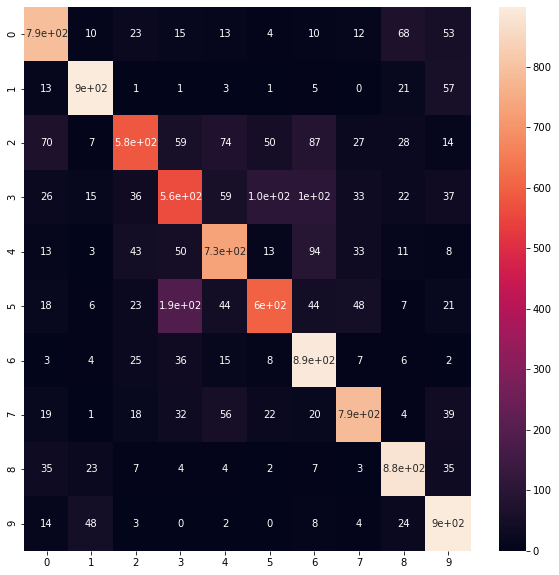

In [18]:
# plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

MODEL TRAINING USING AUGEMENTED DATASET

In [19]:
# generating more data using the existing data
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            #width_shift_range = 0.1,
                            horizontal_flip = True,
                             )
datagen.fit(X_train)

In [20]:
# retraining the model

cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6576 - accuracy: 0.7744
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6169 - accuracy: 0.7861
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5928 - accuracy: 0.7925
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5733 - accuracy: 0.8002
Epoch 5/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5588 - accuracy: 0.8054


In [21]:
# encoding the Predictor variable
y_test = keras.utils.to_categorical(y_test, 10)

In [22]:
# printing the accuracy
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.6668 - accuracy: 0.7880
Test accuracy 0.7879999876022339
